In [117]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name: ______________________
- PRN : ______________________

# Image Processing with Neural Network
## Assignment A01

## Implement of MP Neuron

## 1. Import Statements

In [121]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # for train-test splitting
from sklearn.metrics import accuracy_score  # for accuracy score calculation

## 2. Setup Global Parameters

In [123]:
###------------------
### Global Parameters
###------------------

# Directories
inpDir = '../../../input'
outDir = '../output'


RANDOM_STATE = 42 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE  = 0.2 # Size of test data

# Parameters for plotting
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
         }

CMAP = plt.cm.coolwarm
plt.rcParams.update(params)
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [124]:
#load data

data_df = pd.read_csv('breast_cancer_mod.csv')
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [125]:
data_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [126]:
# check unique values in each of the columnns
for col in data_df.columns:
    print(f'{col}: {data_df[col].unique()}')

mean radius: [0 1]
mean texture: [0 1]
mean perimeter: [0 1]
mean area: [0 1]
mean smoothness: [0 1]
mean compactness: [0 1]
mean concavity: [0 1]
mean concave points: [0 1]
mean symmetry: [0 1]
mean fractal dimension: [1 0]
radius error: [0 1]
texture error: [1 0]
perimeter error: [0 1]
area error: [0 1]
smoothness error: [1 0]
compactness error: [1 0]
concavity error: [1 0]
concave points error: [1 0]
symmetry error: [1 0]
fractal dimension error: [1 0]
worst radius: [0 1]
worst texture: [0 1]
worst perimeter: [0 1]
worst area: [0 1]
worst smoothness: [1 0]
worst compactness: [1 0]
worst concavity: [0 1]
worst concave points: [0 1]
worst symmetry: [1 0]
worst fractal dimension: [1 0]
target: [0 1]


<h4>Classs Distribution</h4>

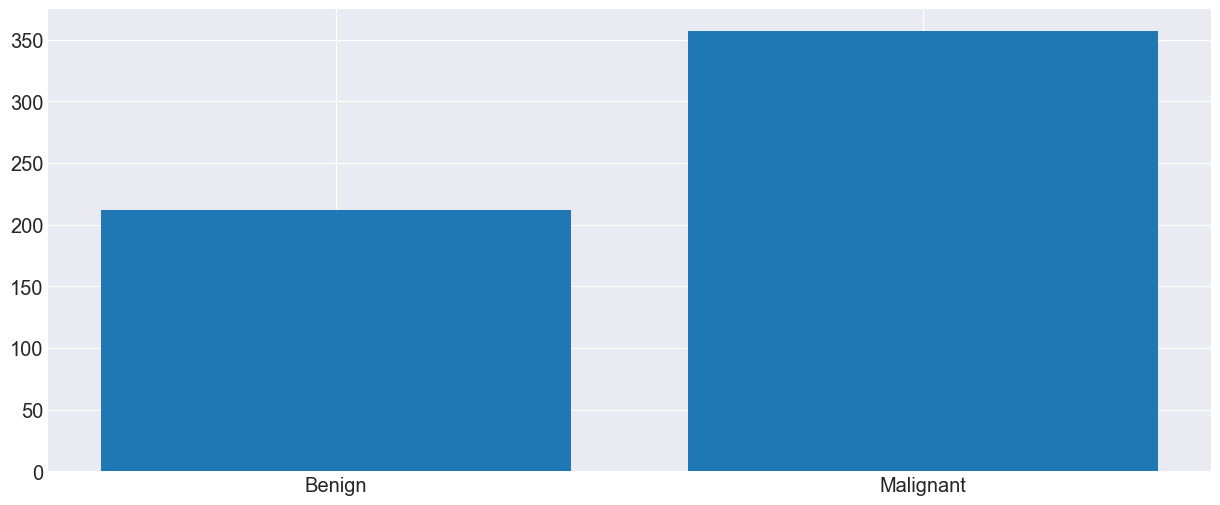

In [128]:
labels = ['Malignant', 'Benign']

fig, ax = plt.subplots()

ax.bar(data_df['target'].value_counts().index, data_df['target'].value_counts().values)

ax.set_xticks(data_df['target'].value_counts().index)

ax.set_xticklabels(labels);

task 1 : plot pie chart for target column . comment each line

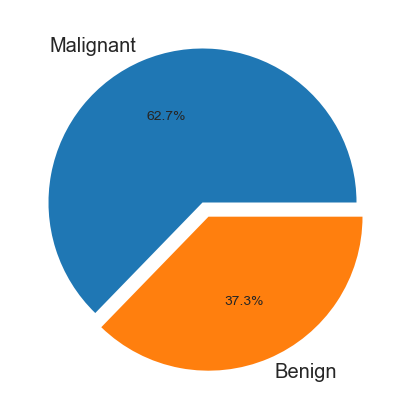

In [130]:
fig, ax = plt.subplots(figsize= (5,5))
explode = (0,0.1)
ax.pie(data_df['target'].value_counts(),explode=explode, labels= labels, autopct='%1.1f%%');

In [131]:
features_df= data_df.drop('target',axis=1)
labels_df=data_df[['target']]

In [132]:
#split features and labels in train and test sets
X_train, X_test , y_train, y_test = train_test_split(features_df, labels_df, test_size=TEST_SIZE,stratify=labels_df,random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

<h4>MP Neurons</h4>
<h5>step 1: sum all the columns
step 2: compare with a threshold</h5>

In [134]:
X_train['total'] = X_train.astype(np.int16).sum(axis = 1)

X_train['target'] = y_train 

X_train.sort_values('total', inplace = True)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0


In [135]:
X_test['total'] = X_test.astype(np.int16).sum(axis = 1)

X_test['target'] = y_test

X_test.sort_values('total', inplace = True)

X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
14,0,1,0,1,0,0,0,0,0,1,...,0,1,0,1,1,0,0,1,17,0
20,0,0,0,1,1,0,0,0,0,1,...,0,1,0,1,1,0,1,1,18,0
21,0,1,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,19,0
39,0,1,0,0,1,1,0,0,0,1,...,0,1,1,1,0,0,1,1,20,0


In [153]:
tmp_df = X_train.groupby(['total', 'target']).agg({'target': 'count'})

tmp_df.columns = ['count']

tmp_df.reset_index(inplace = True)

tmp_df.head()

,total,target,count
0,12,0,1
1,13,0,1
2,14,0,2
3,15,0,4
4,16,0,5


In [155]:
tmp_df.tail()

,total,target,count
23,28,1,34
24,29,0,14
25,29,1,46
26,30,0,7
27,30,1,175


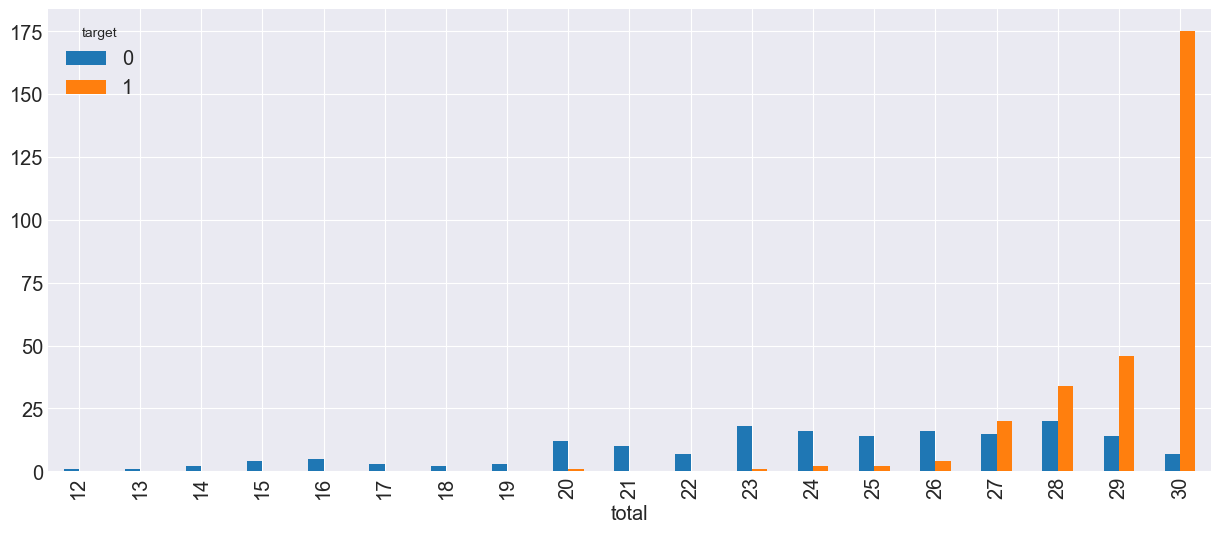

In [159]:
tmp_df.pivot(index = 'total', columns = 'target', values = 'count').plot(kind = 'bar');

In [161]:
accuracy = {}

for b in range(X_train.shape[1]):

    X_train['pred'] = X_train['total'] >= b

    accuracy[b] = accuracy_score(y_true = X_train['target'], y_pred = X_train['pred'])

    

In [163]:
accuracy

{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6307692307692307,
 15: 0.6351648351648351,
 16: 0.643956043956044,
 17: 0.654945054945055,
 18: 0.6615384615384615,
 19: 0.6659340659340659,
 20: 0.6725274725274726,
 21: 0.6967032967032967,
 22: 0.7186813186813187,
 23: 0.734065934065934,
 24: 0.7714285714285715,
 25: 0.8021978021978022,
 26: 0.8285714285714286,
 27: 0.8549450549450549,
 28: 0.843956043956044,
 29: 0.8131868131868132,
 30: 0.7428571428571429,
 31: 0.37362637362637363}

In [171]:
best_b = max(accuracy, key = accuracy.get)

best_b

27

In [173]:
accuracy[best_b]

0.8549450549450549

In [179]:
X_test['pred'] = X_test['total'] >= best_b

test_accuracy = accuracy_score(y_true = X_test['target'], y_pred = X_test['pred'])

In [181]:
test_accuracy

0.8508771929824561

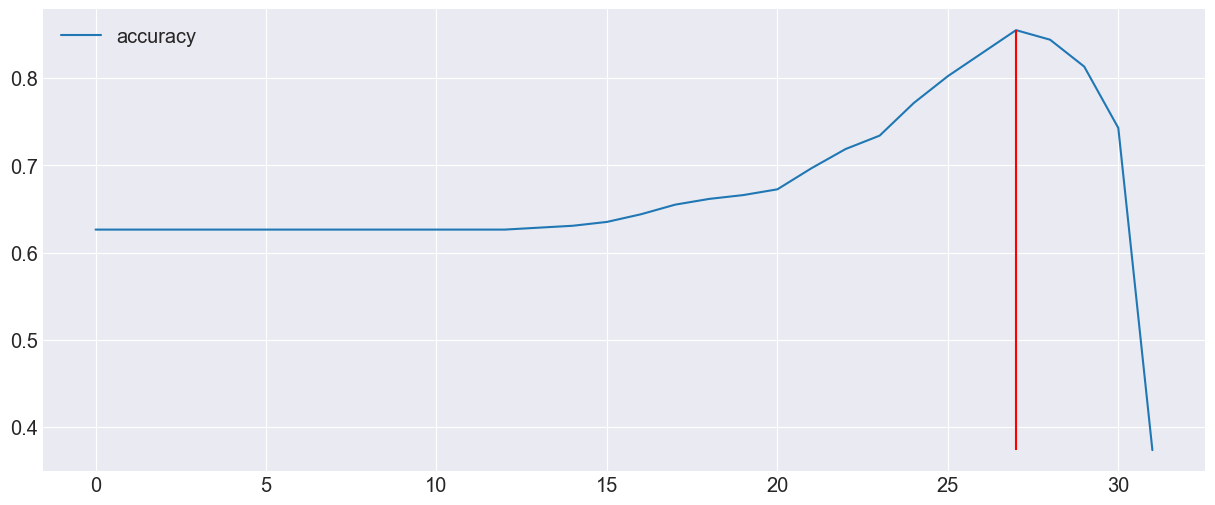

In [185]:
ax = pd.DataFrame([accuracy], index = ['accuracy']).T.plot()

ax.vlines(x = best_b, ymax = accuracy[best_b], ymin = min(accuracy.values()), colors = 'r')